#### Import our DATASET

In [99]:
import pandas as pd
import seaborn as sns

In [53]:
df=pd.read_csv('/Users/sergio/Desktop/IRONHACK/tracks.csv')

In [54]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [110]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,artist_genre_list,main_genre,is_hit,is_popular,pop_bucket,duration_min_scaled,danceability_scaled,energy_scaled,loudness_scaled,instrumentalness_scaled
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,[],Other,0,0,somewhat_pop,0.028642,0.679150,0.867,0.921408,0.000000
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,"[adult standards, easy listening, lounge]",Other,0,0,somewhat_pop,0.033786,0.322874,0.201,0.665757,0.000000
5,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,...,"[adult standards, easy listening, lounge]",Other,0,0,non_pop,0.042949,0.272267,0.129,0.659455,0.000005
16,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.212,...,"[canadian singer-songwriter, folk, folk rock, ...",Rock,0,0,non_pop,0.057081,0.651822,0.212,0.728069,0.000022
17,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",18,295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.627,0.184,...,"[canadian singer-songwriter, folk, folk rock, ...",Rock,0,0,non_pop,0.053747,0.634615,0.184,0.704096,0.000162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279052,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,...,[chinese viral pop],Pop,0,0,somewhat_pop,0.046925,0.566802,0.518,0.840680,0.000000
279053,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,...,"[alt z, alternative r&b, bedroom pop, indie ca...",Pop,0,1,very_pop,0.027481,0.774291,0.663,0.878765,0.000297
279054,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,...,"[alt z, electropop, indie pop, la indie, pop, ...",Pop,0,1,very_pop,0.033836,0.541498,0.314,0.750008,0.000150
279055,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,...,"[chill r&b, indie cafe pop, singaporean pop]",Pop,0,1,very_pop,0.025389,0.704453,0.615,0.862010,0.000003


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

##  Data Cleaning

In [56]:
# convert release date to year

df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year.astype('Int64')

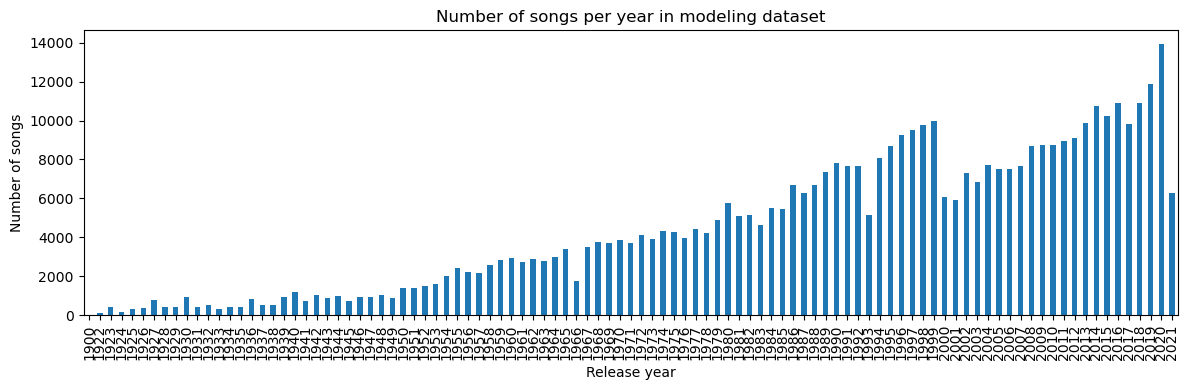

In [57]:
import matplotlib.pyplot as plt

year_counts=df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
year_counts.plot(kind='bar')
plt.xlabel('Release year')
plt.ylabel('Number of songs')
plt.title('Number of songs per year in modeling dataset')
plt.tight_layout()
plt.show()

In [58]:
#let´s narrow down our dataset to modern era 1991 - 2021

df_main=df[(df['release_year']>=1990)].copy()

df.shape, df_main.shape




((586672, 21), (279057, 21))

In [59]:
# convert time ms to minutes

df_main['duration_min']=df_main['duration_ms']/60000

In [60]:
df_main['popularity'].describe()

count    279057.000000
mean         35.919314
std          17.702042
min           0.000000
25%          24.000000
50%          37.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [61]:
(df_main['popularity'] >= 75).mean(), (df_main['popularity'] >= 75).sum()


(np.float64(0.009707694127006311), np.int64(2709))

In [62]:
#Finally we will import artist csv to do analysis on genre as well

df_artists=pd.read_csv('/Users/sergio/Desktop/IRONHACK/FINAL PROJECT/artists.csv')

In [63]:
df_main[['artists', 'id_artists']]


,artists,id_artists
39501,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8']
39511,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS']
39517,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8']
39521,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8']
39529,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0']
...,...,...
586667,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ']
586668,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z']
586669,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX']
586670,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g..."


In [64]:
import ast  # built-in, safely parses Python literals like "['a','b']"

def get_first_id(x):
    try:
        ids = ast.literal_eval(x)        # turn the string "['id1', 'id2']" into a real list
        if isinstance(ids, list) and len(ids) > 0:
            return ids[0]                # take the first artist as the main one
    except (ValueError, SyntaxError, TypeError):
        return None                      # in case of any weird value

df_main['main_artist_id'] = df_main['id_artists'].apply(get_first_id)
df_main[['artists', 'id_artists', 'main_artist_id']].head()


,artists,id_artists,main_artist_id
39501,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],3UmBeGyNwr4iDWi1vTxWi8
39511,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],6lH5PpuiMa5SpfjoIOlwCS
39517,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],3UmBeGyNwr4iDWi1vTxWi8
39521,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],3UmBeGyNwr4iDWi1vTxWi8
39529,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],1Mxqyy3pSjf8kZZL4QVxS0


In [65]:
# merging datasets on artist id, adding genre

# 1) Keep only the columns we need from the artists table and rename them
df_artists_genres = (
    df_artists[['id', 'genres']]
    .rename(columns={'id': 'main_artist_id', 'genres': 'artist_genres'})
)

# 2) Merge into df_main using main_artist_id
df_main = df_main.merge(df_artists_genres, on='main_artist_id', how='left')



In [66]:
# 3) Quick sanity check
df_main[['artists', 'main_artist_id', 'artist_genres']]

,artists,main_artist_id,artist_genres
0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,"['adult standards', 'brill building pop', 'bri..."
1,['The Toys'],6lH5PpuiMa5SpfjoIOlwCS,NaN
2,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,"['adult standards', 'brill building pop', 'bri..."
3,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,"['adult standards', 'brill building pop', 'bri..."
4,['Frank Sinatra'],1Mxqyy3pSjf8kZZL4QVxS0,"['adult standards', 'easy listening', 'lounge']"
...,...,...,...
279052,['阿YueYue'],1QLBXKM5GCpyQQSVMNZqrZ,['chinese viral pop']
279053,['ROLE MODEL'],1dy5WNgIKQU6ezkpZs4y8z,"['alt z', 'alternative r&b', 'bedroom pop', 'i..."
279054,['FINNEAS'],37M5pPGs6V1fchFJSgCguX,"['alt z', 'electropop', 'indie pop', 'la indie..."
279055,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS,"['chill r&b', 'indie cafe pop', 'singaporean p..."


In [67]:
#Unifying Genre into an usable column

import ast

def parse_genre_list(x):
    if pd.isna(x):
        return []
    try:
        genres = ast.literal_eval(x)
        if isinstance(genres, list):
            return [g.lower() for g in genres]  # normalize to lowercase
        return []
    except (ValueError, SyntaxError, TypeError):
        return []

df_main['artist_genre_list'] = df_main['artist_genres'].apply(parse_genre_list)
df_main[['artists', 'artist_genres', 'artist_genre_list']].head()

SUPER_GENRES = [
    ('pop',        'Pop'),
    ('rock',       'Rock'),
    ('metal',      'Rock/Metal'),
    ('punk',       'Rock/Metal'),
    ('hip hop',    'Hip-Hop/Rap'),
    ('rap',        'Hip-Hop/Rap'),
    ('trap',       'Hip-Hop/Rap'),
    ('r&b',        'R&B'),
    ('soul',       'R&B'),
    ('electronic', 'Electronic'),
    ('edm',        'Electronic'),
    ('house',      'Electronic'),
    ('techno',     'Electronic'),
    ('dance',      'Dance'),
    ('indie',      'Indie/Alternative'),
    ('alternative','Indie/Alternative'),
    ('latin',      'Latin'),
    ('reggaeton',  'Latin'),
    ('salsa',      'Latin'),
    ('k-pop',      'K-Pop'),
    ('j-pop',      'J-Pop'),
    ('country',    'Country'),
    ('jazz',       'Jazz'),
    ('blues',      'Blues'),
    ('classical',  'Classical'),
]

def map_to_super_genre(genre_list):
    if not genre_list:
        return 'Other'
    
    text = ' '.join(genre_list)  # one big lowercase string
    for keyword, label in SUPER_GENRES:
        if keyword in text:
            return label
    return 'Other'

df_main['main_genre'] = df_main['artist_genre_list'].apply(map_to_super_genre)
df_main[['artists', 'artist_genres', 'main_genre']].head()


,artists,artist_genres,main_genre
0,['Gerry & The Pacemakers'],"['adult standards', 'brill building pop', 'bri...",Pop
1,['The Toys'],NaN,Other
2,['Gerry & The Pacemakers'],"['adult standards', 'brill building pop', 'bri...",Pop
3,['Gerry & The Pacemakers'],"['adult standards', 'brill building pop', 'bri...",Pop
4,['Frank Sinatra'],"['adult standards', 'easy listening', 'lounge']",Other


In [68]:
df_main['main_genre'].value_counts().head(20)


main_genre
Pop                  137122
Other                 68751
Rock                  31409
Hip-Hop/Rap           19405
Electronic             5145
Rock/Metal             3454
Latin                  3087
Jazz                   2264
R&B                    2193
Classical              2158
Indie/Alternative      2026
Country                1218
Dance                   690
Blues                   135
Name: count, dtype: int64

### EDA

In [69]:
numeric_cols = [
    'popularity', 'duration_min',
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

df_main[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,279057.0,35.919314,17.702042,0.000000,24.000000,37.000000,48.000000,100.000000
duration_min,279057.0,3.928987,1.953658,0.082283,3.167917,3.765333,4.461117,90.058333
danceability,279057.0,0.596743,0.160058,0.000000,0.495000,0.609000,0.713000,0.991000
energy,279057.0,0.628054,0.226707,0.000000,0.472000,0.653000,0.813000,1.000000
loudness,279057.0,-8.295521,4.195500,-60.000000,-10.188000,-7.384000,-5.471000,2.534000
speechiness,279057.0,0.091716,0.131008,0.000000,0.033500,0.045300,0.082600,0.968000
acousticness,279057.0,0.317127,0.300996,0.000000,0.042200,0.221000,0.553000,0.996000
instrumentalness,279057.0,0.076787,0.224630,0.000000,0.000000,0.000005,0.001170,1.000000
liveness,279057.0,0.208619,0.183933,0.000000,0.095900,0.132000,0.270000,1.000000
valence,279057.0,0.541522,0.254275,0.000000,0.337000,0.546000,0.754000,1.000000


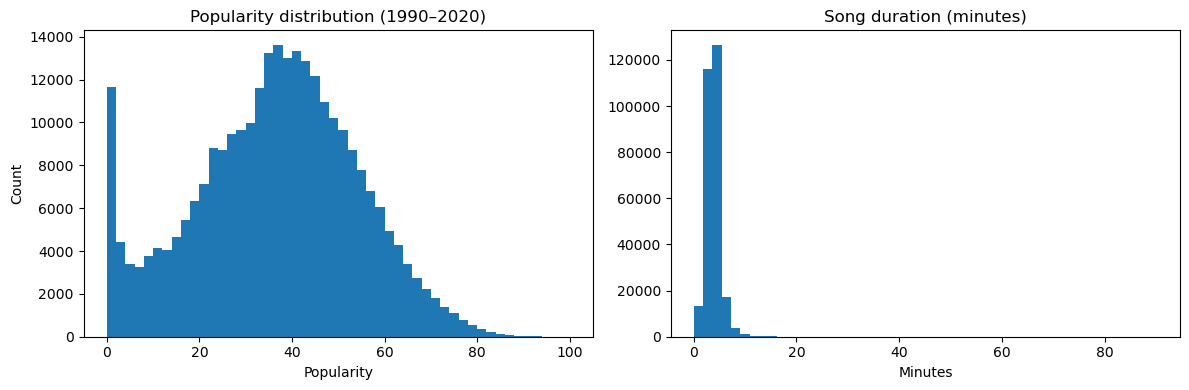

In [70]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Popularity
axes[0].hist(df_main['popularity'], bins=50)
axes[0].set_title('Popularity distribution (1990–2020)')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Count')

# Duration
axes[1].hist(df_main['duration_min'], bins=50)
axes[1].set_title('Song duration (minutes)')
axes[1].set_xlabel('Minutes')

plt.tight_layout()
plt.show()

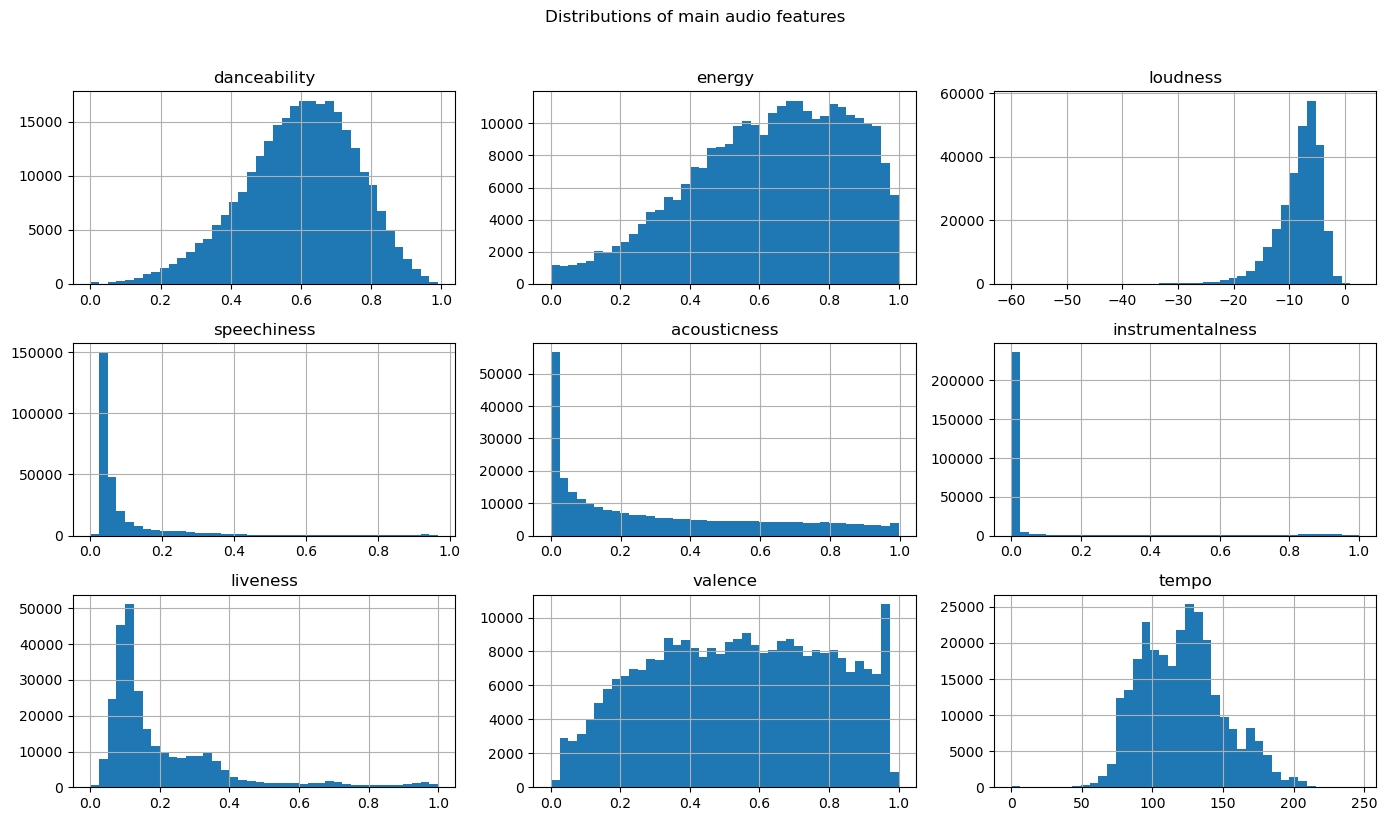

In [71]:
numeric_cols = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

df_main[numeric_cols].hist(bins=40, figsize=(14, 8))
plt.suptitle('Distributions of main audio features', y=1.02)
plt.tight_layout()
plt.show()

In [72]:
# create is hit column -> criteria: tracks with more than 75 in popularity
df_main['is_hit']=(df_main['popularity'] >= 75).astype(int)

In [73]:
df_main['is_hit'].value_counts(), df_main['is_hit'].value_counts(normalize=True)


(is_hit
 0    276348
 1      2709
 Name: count, dtype: int64,
 is_hit
 0    0.990292
 1    0.009708
 Name: proportion, dtype: float64)

In [74]:
df_main['is_hit']

0         0
1         0
2         0
3         0
4         0
         ..
279052    0
279053    0
279054    0
279055    0
279056    0
Name: is_hit, Length: 279057, dtype: int64

In [75]:
top20_hits = (
    df_main[df_main['is_hit'] == 1]
    .sort_values('popularity', ascending=False)
    [['name', 'artists', 'main_genre', 'release_year', 'popularity']]
    .head(20)
)

top20_hits

,name,artists,main_genre,release_year,popularity
27393,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",Pop,2021,100
27394,drivers license,['Olivia Rodrigo'],Pop,2021,99
27395,Astronaut In The Ocean,['Masked Wolf'],Hip-Hop/Rap,2021,98
26403,Save Your Tears,['The Weeknd'],Pop,2020,97
26404,telepatía,['Kali Uchis'],Pop,2020,97
27396,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",Pop,2021,96
26406,Blinding Lights,['The Weeknd'],Pop,2020,96
26407,The Business,['Tiësto'],Pop,2020,95
27398,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",Pop,2021,94
27397,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",Hip-Hop/Rap,2021,94


In [76]:
top20_hits = (
    df_main[df_main['is_hit'] == 1]
    .sort_values('popularity', ascending=False)
    [['name', 'artists', 'main_genre', 'release_year', 'popularity']]
    .head(20)
)

top20_hits

,name,artists,main_genre,release_year,popularity
27393,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",Pop,2021,100
27394,drivers license,['Olivia Rodrigo'],Pop,2021,99
27395,Astronaut In The Ocean,['Masked Wolf'],Hip-Hop/Rap,2021,98
26403,Save Your Tears,['The Weeknd'],Pop,2020,97
26404,telepatía,['Kali Uchis'],Pop,2020,97
27396,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",Pop,2021,96
26406,Blinding Lights,['The Weeknd'],Pop,2020,96
26407,The Business,['Tiësto'],Pop,2020,95
27398,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",Pop,2021,94
27397,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",Hip-Hop/Rap,2021,94


In [77]:
# 1) Counts and hit rate by year
hits_per_year = df_main.groupby('release_year')['is_hit'].sum()
total_per_year = df_main.groupby('release_year')['is_hit'].count()
hit_rate_per_year = hits_per_year / total_per_year  # fraction of tracks that are hits

hits_per_year.head(), hit_rate_per_year.head()

(release_year
 1990     4
 1991    18
 1992     8
 1993     9
 1994    13
 Name: is_hit, dtype: int64,
 release_year
 1990    0.000513
 1991    0.002344
 1992    0.001044
 1993    0.001750
 1994    0.001605
 Name: is_hit, dtype: float64)

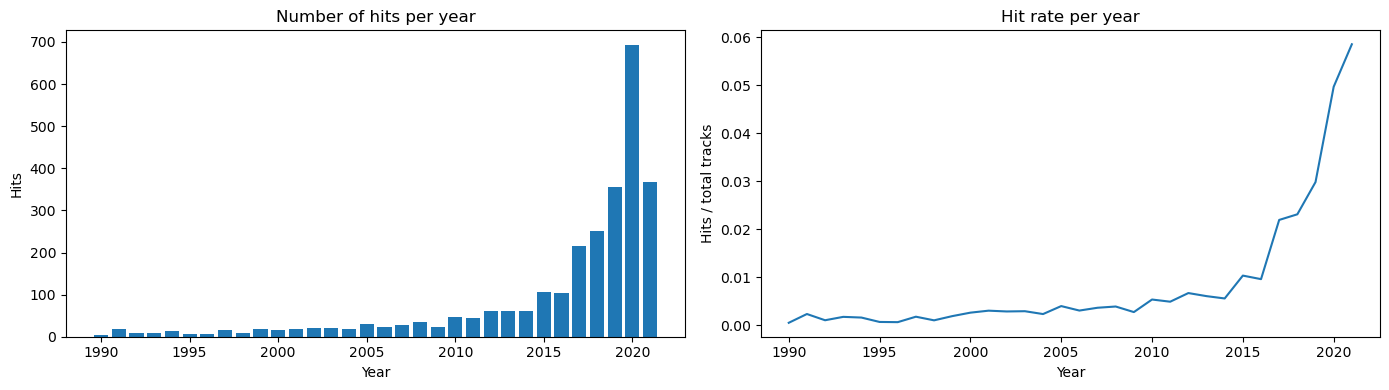

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Number of hits per year
axes[0].bar(hits_per_year.index, hits_per_year.values)
axes[0].set_title('Number of hits per year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Hits')

# Hit rate per year
axes[1].plot(hit_rate_per_year.index, hit_rate_per_year.values)
axes[1].set_title('Hit rate per year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Hits / total tracks')

plt.tight_layout()
plt.show()

In [79]:
#because of spotify definition of popularity, we decide to narrow the dataset to the last decade available. 2010-2020

df_decade = df_main[
    (df_main['release_year'] >= 2010)
].copy()

df_main.shape, df_decade.shape


((279057, 27), (121426, 27))

In [80]:
#how many hits do we have in this decade
df_decade['is_hit'].value_counts(), df_decade['is_hit'].value_counts(normalize=True)


(is_hit
 0    119059
 1      2367
 Name: count, dtype: int64,
 is_hit
 0    0.980507
 1    0.019493
 Name: proportion, dtype: float64)

### Let´s now begin to answer the business questions

In [81]:
numeric_cols= [
    'duration_min',
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

hit_vs_not = (
    df_decade
    .groupby('is_hit')[numeric_cols]
    .mean()
    .T
)

hit_vs_not['diff_hit_minus_non'] = hit_vs_not[1] - hit_vs_not[0]
hit_vs_not.sort_values('diff_hit_minus_non', ascending=False)

is_hit,0,1,diff_hit_minus_non
loudness,-7.368371,-6.326430,1.041942
danceability,0.616618,0.670237,0.053619
speechiness,0.095301,0.106094,0.010793
valence,0.511331,0.503637,-0.007694
energy,0.654708,0.633143,-0.021565
liveness,0.203173,0.169366,-0.033808
acousticness,0.285781,0.249053,-0.036728
instrumentalness,0.095771,0.017382,-0.078388
tempo,122.026726,121.842782,-0.183944
duration_min,3.802990,3.397096,-0.405894


In [82]:
#let´s reframe popularity threshold by looking into the quantiles

df_decade['popularity'].describe(), df_decade['popularity'].quantile([0.6, 0.75, 0.8, 0.9])

(count    121426.000000
 mean         39.674510
 std          20.751278
 min           0.000000
 25%          29.000000
 50%          43.000000
 75%          54.000000
 max         100.000000
 Name: popularity, dtype: float64,
 0.60    48.0
 0.75    54.0
 0.80    57.0
 0.90    63.0
 Name: popularity, dtype: float64)

In [83]:
# define popularity threshold for "popular track"
popular_threshold = 57  # 80th percentile from your quantiles

df_decade['is_popular'] = (df_decade['popularity'] >= popular_threshold).astype(int)

df_decade['is_popular'].value_counts(), df_decade['is_popular'].value_counts(normalize=True)


(is_popular
 0    96361
 1    25065
 Name: count, dtype: int64,
 is_popular
 0    0.793578
 1    0.206422
 Name: proportion, dtype: float64)

In [84]:
#let´s redo the comparison: how do audio features differ between popular and less popular tracks?

popular_vs_not = (
    df_decade
    .groupby('is_popular')[numeric_cols]
    .mean()
    .T
)

popular_vs_not['diff_pop_minus_non'] = popular_vs_not[1] - popular_vs_not[0]
popular_vs_not.sort_values('diff_pop_minus_non', ascending=False)

is_popular,0,1,diff_pop_minus_non
loudness,-7.483255,-6.828312,0.654943
danceability,0.610060,0.646894,0.036833
speechiness,0.092914,0.105494,0.012579
acousticness,0.284652,0.286649,0.001997
valence,0.513383,0.502716,-0.010666
energy,0.659159,0.635557,-0.023602
liveness,0.207489,0.183388,-0.024101
instrumentalness,0.108918,0.037824,-0.071094
duration_min,3.851600,3.577780,-0.273820
tempo,122.173483,121.445160,-0.728323


In [85]:
#let´s reframe and add bins for popularity

bins = [-0.1, 25, 55, 75, 100]
labels = ['non_pop', 'somewhat_pop', 'very_pop', 'hit']

df_decade['pop_bucket'] = pd.cut(df_decade['popularity'], bins=bins, labels=labels)

df_decade['pop_bucket'].value_counts().sort_index()

pop_bucket
non_pop         26525
somewhat_pop    67502
very_pop        25449
hit              1950
Name: count, dtype: int64

In [86]:
#let´s run our comparisons again

bucket_means = (
    df_decade
    .groupby('pop_bucket')[numeric_cols]
    .mean()
    .T
)

bucket_means

/var/folders/sh/7twmcx310r92k4q4qz3tvs2m0000gn/T/ipykernel_31851/2468012730.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('pop_bucket')[numeric_cols]


pop_bucket,non_pop,somewhat_pop,very_pop,hit
duration_min,4.016490,3.792192,3.603142,3.388067
danceability,0.574197,0.623197,0.644199,0.671069
energy,0.688842,0.648330,0.635719,0.632809
loudness,-8.321147,-7.166900,-6.891986,-6.334818
speechiness,0.089276,0.094143,0.104889,0.105272
acousticness,0.232265,0.304454,0.291440,0.248880
instrumentalness,0.281662,0.043117,0.040317,0.018418
liveness,0.243698,0.194003,0.184800,0.168127
valence,0.470394,0.530640,0.502742,0.502533
tempo,123.760656,121.591830,121.360517,121.966662


In [ ]:
# drop is_hit column, and we will re do it
df_decade.drop(['is_hit'], axis=1)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,tempo,time_signature,release_year,duration_min,main_artist_id,artist_genres,artist_genre_list,main_genre,is_popular,pop_bucket
1,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,120.689,4,2020,2.659333,6lH5PpuiMa5SpfjoIOlwCS,NaN,[],Other,0,somewhat_pop
4,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,117.153,3,2018,3.122217,1Mxqyy3pSjf8kZZL4QVxS0,"['adult standards', 'easy listening', 'lounge']","[adult standards, easy listening, lounge]",Other,0,somewhat_pop
5,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,...,82.332,3,2018,3.946667,1Mxqyy3pSjf8kZZL4QVxS0,"['adult standards', 'easy listening', 'lounge']","[adult standards, easy listening, lounge]",Other,0,non_pop
16,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.212,...,117.072,3,2020,5.218217,5hW4L92KnC6dX9t7tYM4Ve,"['canadian singer-songwriter', 'folk', 'folk r...","[canadian singer-songwriter, folk, folk rock, ...",Rock,0,non_pop
17,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",18,295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.627,0.184,...,115.864,4,2020,4.918217,5hW4L92KnC6dX9t7tYM4Ve,"['canadian singer-songwriter', 'folk', 'folk r...","[canadian singer-songwriter, folk, folk rock, ...",Rock,0,non_pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279052,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,...,131.896,4,2020,4.304450,1QLBXKM5GCpyQQSVMNZqrZ,['chinese viral pop'],[chinese viral pop],Pop,0,somewhat_pop
279053,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,...,150.091,4,2020,2.554883,1dy5WNgIKQU6ezkpZs4y8z,"['alt z', 'alternative r&b', 'bedroom pop', 'i...","[alt z, alternative r&b, bedroom pop, indie ca...",Pop,1,very_pop
279054,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,...,145.095,4,2020,3.126683,37M5pPGs6V1fchFJSgCguX,"['alt z', 'electropop', 'indie pop', 'la indie...","[alt z, electropop, indie pop, la indie, pop, ...",Pop,1,very_pop
279055,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,...,90.029,4,2021,2.366717,4jGPdu95icCKVF31CcFKbS,"['chill r&b', 'indie cafe pop', 'singaporean p...","[chill r&b, indie cafe pop, singaporean pop]",Pop,1,very_pop


In [ ]:
df_decade['is_hit']=df_decade['popularity']>=75

## Hypothesis testing

 *H0= there are no difference in the averages between the four popularity buckets for these main variables: duration, dencaebility, loudness, instrumentallness, speechiness*.

 *H1= at least one popularity buckets presents statistically significant differences of the averages for these main variables: duration, dencaebility, loudness, instrumentallness*


#### As we are dealing with 4 "groups" we will apply one way ANOVA, to examine the  on our variable (is_hit)


In [93]:
from scipy import stats

#define the orders of the buckes & features

buckets_order= ['non_pop', 'somewhat_pop', 'very_pop', 'hit']
features_to_test=['duration_min', 'danceability', 'loudness', 'instrumentalness']

#function to get anova for one feature


def anova_for_feature(feat):
    groups = [
        df_decade.loc[df_decade['pop_bucket'] == b, feat].dropna()
        for b in buckets_order
    ]
    f_stat, p_val = stats.f_oneway(*groups)
    return f_stat, p_val

for feat in features_to_test:
    f, p = anova_for_feature(feat)
    print(f"{feat:16s} F = {f:8.2f}, p = {p:.2e}")


duration_min     F =   173.10, p = 5.42e-112
danceability     F =  1026.89, p = 0.00e+00
loudness         F =   775.47, p = 0.00e+00
instrumentalness F =  7434.82, p = 0.00e+00


In [114]:
# now lets perform a T-test for extreme: low popularity vs popular tracks

from scipy import stats
import numpy as np

features_to_test = ['duration_min', 'danceability', 'loudness', 'instrumentalness', 'energy']

# definimos los extremos
low  = df_decade[df_decade['pop_bucket'] == 'non_pop']
high = df_decade[df_decade['pop_bucket'].isin(['very_pop', 'hit'])]

for feat in features_to_test:
    # valores de la feature en cada grupo
    x = low[feat].dropna()   # no populares
    y = high[feat].dropna()  # muy populares + hits
    
    # t-test de medias (varianzas desiguales = Welch)
    t_stat, p_val = stats.ttest_ind(y, x, equal_var=False)
    
    # Cohen's d como tamaño de efecto (qué tan grande es la diferencia)
    pooled_std = np.sqrt(((x.var() * (len(x)-1)) + (y.var() * (len(y)-1))) /
                         (len(x) + len(y) - 2))
    cohen_d = (y.mean() - x.mean()) / pooled_std
    
    print(f"{feat:16s} t = {t_stat:8.2f}, p = {p_val:.2e}, d = {cohen_d:.2f}")

duration_min     t =   -17.65, p = 2.23e-69, d = -0.15
danceability     t =    51.51, p = 0.00e+00, d = 0.44
loudness         t =    41.16, p = 0.00e+00, d = 0.36
instrumentalness t =   -96.16, p = 0.00e+00, d = -0.84
energy           t =   -27.46, p = 9.07e-165, d = -0.24


#### *Results: the differences are statistically aignificant between both groups. Instrumentallness and danceability have the most impact*

# Now let´s print a correlation heatmap to see the overall effect of each audiofeature 

In [ ]:
numeric_cols = [
    'popularity',
    'duration_min',
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'temp 
]

corr = df_decade[numeric_cols].corr()
corr

,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.074972,0.163640,-0.085116,0.144864,0.052687,0.073451,-0.368527,-0.117425,0.055138,-0.028433
duration_min,-0.074972,1.000000,-0.093032,-0.007341,-0.014890,-0.074434,-0.012555,0.065616,0.008847,-0.125081,0.003196
danceability,0.163640,-0.093032,1.000000,0.121409,0.220611,0.190987,-0.166877,-0.168757,-0.174648,0.436999,-0.085404
energy,-0.085116,-0.007341,0.121409,1.000000,0.703591,0.073937,-0.669044,-0.032404,0.172470,0.331737,0.181427
loudness,0.144864,-0.014890,0.220611,0.703591,1.000000,0.005987,-0.479202,-0.362203,0.032653,0.303591,0.152787
speechiness,0.052687,-0.074434,0.190987,0.073937,0.005987,1.000000,-0.044730,-0.092686,0.060557,0.072816,0.018611
acousticness,0.073451,-0.012555,-0.166877,-0.669044,-0.479202,-0.044730,1.000000,-0.014980,-0.064738,-0.152724,-0.145240
instrumentalness,-0.368527,0.065616,-0.168757,-0.032404,-0.362203,-0.092686,-0.014980,1.000000,0.042861,-0.216965,-0.001858
liveness,-0.117425,0.008847,-0.174648,0.172470,0.032653,0.060557,-0.064738,0.042861,1.000000,-0.009810,0.009596
valence,0.055138,-0.125081,0.436999,0.331737,0.303591,0.072816,-0.152724,-0.216965,-0.009810,1.000000,0.060304


In [97]:
# Correlation tables: we can see the overall correlation of different variables: danceability and loudness have the most significant direct relation, while intrumantalness, liveliness and energy have inverse direct correlation to popularity
corr_with_pop = corr['popularity'].sort_values(ascending=False)
corr_with_pop

popularity          1.000000
danceability        0.163640
loudness            0.144864
acousticness        0.073451
valence             0.055138
speechiness         0.052687
tempo              -0.028433
duration_min       -0.074972
energy             -0.085116
liveness           -0.117425
instrumentalness   -0.368527
Name: popularity, dtype: float64

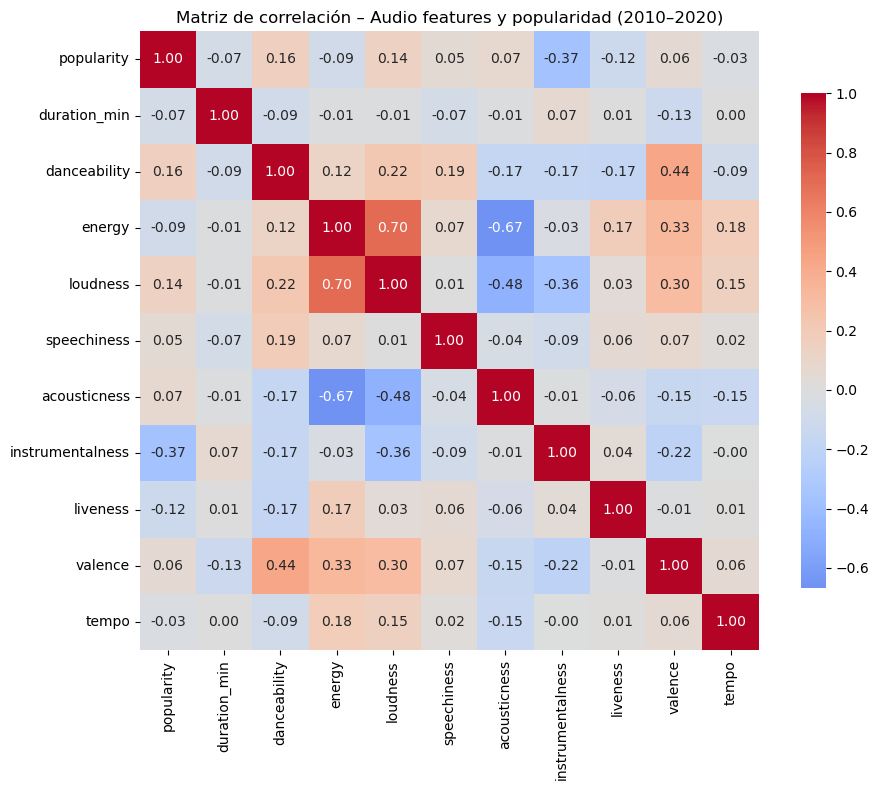

In [ ]:
#Correlation heat map 

plt.figure(figsize=(10, 8))
 
sns.heatmap(
    corr,
    annot=True,        # añade los valores numéricos en cada celda
    fmt=".2f",         # 2 decimales
    cmap="coolwarm",
    center=0,
    square=True,       # celdas cuadradas
    cbar_kws={"shrink": 0.8}  # barra de color más pequeña
)

plt.title('Matriz de correlación – Audio features y popularidad (2010–2020)')
plt.tight_layout()
plt.show()

In [105]:
# Let´s save our dataset for switching into Tableu and visualize the insights

# define the columns that we want to analyze in tableau
cols_tableau = [
    'name',
    'artists',
    'main_genre',
    'release_year',
    'popularity',
    'pop_bucket',
    'explicit',
    'duration_min',
    'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

# 2. get those columns + filter out everything before 2010
df_tableau = (
    df_decade
    .loc[(df_decade['release_year'] >= 2010), cols_tableau]
    .copy()
)

# save file
df_tableau.to_csv("spotify_2010_2020_for_tableau.csv", index=False)
df_tableau.shape

(121426, 17)

### Generate Graphs for the insights

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset de trabajo (2010–2020)
df = df_decade.copy()

# Features que queremos comparar
feature_cols = ['duration_min', 'danceability', 'energy', 'loudness', 'instrumentalness', 'energy']

# Normalizamos cada feature min-max a 0–1
for col in feature_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col + '_scaled'] = (df[col] - col_min) / (col_max - col_min)

#means by buckets in normalized columns

scaled_cols = [col + '_scaled' for col in feature_cols]

mean_by_bucket = (
    df
    .groupby('pop_bucket')[scaled_cols]
    .mean()
)

mean_by_bucket


/var/folders/sh/7twmcx310r92k4q4qz3tvs2m0000gn/T/ipykernel_31851/3940186389.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('pop_bucket')[scaled_cols]


,duration_min_scaled,danceability_scaled,energy_scaled,loudness_scaled,instrumentalness_scaled,energy_scaled
pop_bucket,,,,,,
non_pop,0.043725,0.581171,0.688842,0.826277,0.281662,0.688842
somewhat_pop,0.041232,0.630766,0.648330,0.845832,0.043117,0.648330
very_pop,0.039131,0.652023,0.635719,0.850490,0.040317,0.635719
hit,0.036741,0.679219,0.632809,0.859929,0.018418,0.632809


In [108]:
# go into large b uckets to graph

# Orden lógico de los buckets
bucket_order = ['non_pop', 'somewhat_pop', 'very_pop', 'hit']
bucket_labels = {
    'non_pop': 'Not popular',
    'somewhat_pop': 'Somewhat popular',
    'very_pop': 'Very popular',
    'hit': 'Hit'
}

plot_df = (
    mean_by_bucket
    .reset_index()
    .melt(
        id_vars='pop_bucket',
        value_vars=scaled_cols,
        var_name='feature',
        value_name='value'
    )
)

# Limpiamos el nombre de la feature (quitamos '_scaled')
plot_df['feature'] = plot_df['feature'].str.replace('_scaled', '')

# Ordenamos buckets como categóricos ordenados
plot_df['pop_bucket'] = pd.Categorical(
    plot_df['pop_bucket'],
    categories=bucket_order,
    ordered=True
)

plot_df


,pop_bucket,feature,value
0,non_pop,duration_min,0.043725
1,somewhat_pop,duration_min,0.041232
2,very_pop,duration_min,0.039131
3,hit,duration_min,0.036741
4,non_pop,danceability,0.581171
5,somewhat_pop,danceability,0.630766
6,very_pop,danceability,0.652023
7,hit,danceability,0.679219
8,non_pop,energy,0.688842
9,somewhat_pop,energy,0.648330


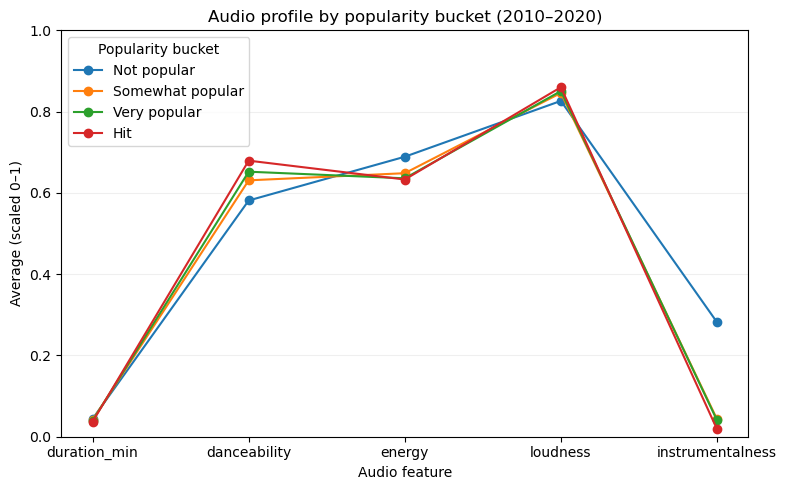

In [116]:
#Graph 

plt.figure(figsize=(8, 5))

for bucket in bucket_order:
    subset = plot_df[plot_df['pop_bucket'] == bucket]
    plt.plot(
        subset['feature'],
        subset['value'],
        marker='o',
        label=bucket_labels[bucket]
    )

plt.ylim(0, 1)
plt.xlabel('Audio feature')
plt.ylabel('Average (scaled 0–1)')
plt.title('Audio profile by popularity bucket (2010–2020)')
plt.legend(title='Popularity bucket')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()

# Para usar en la presentación:
plt.savefig('audio_profile_by_pop_bucket.png', dpi=300, bbox_inches='tight')
plt.show()


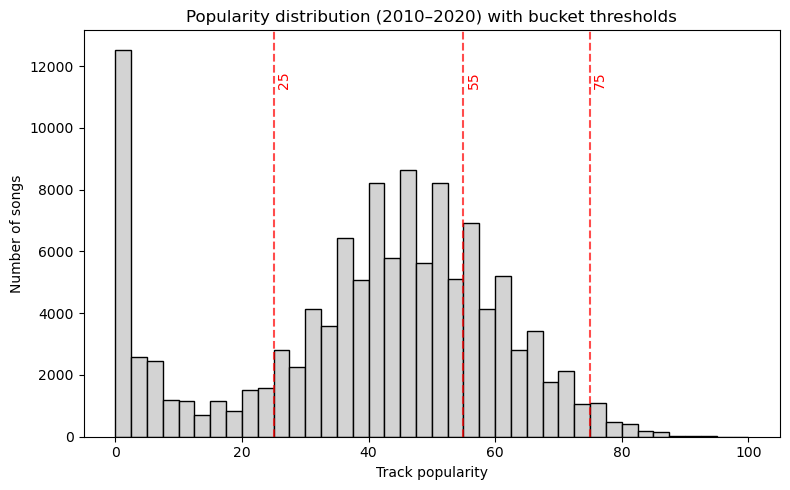

In [111]:
df = df_decade.copy()

# Definimos los cortes de los buckets (los que ya usamos)
cuts = {
    'non_pop / somewhat_pop': 25,
    'somewhat_pop / very_pop': 55,
    'very_pop / hit': 75
}

plt.figure(figsize=(8, 5))

# Histograma de popularidad
plt.hist(df['popularity'], bins=40, color='lightgray', edgecolor='black')
plt.xlabel('Track popularity')
plt.ylabel('Number of songs')
plt.title('Popularity distribution (2010–2020) with bucket thresholds')

# Dibujamos líneas verticales para los cortes
for label, x in cuts.items():
    plt.axvline(x=x, color='red', linestyle='--', alpha=0.7)
    plt.text(x + 0.5, plt.ylim()[1]*0.9, str(x),
             rotation=90, color='red', va='top')

plt.tight_layout()
plt.savefig('popularity_distribution_with_buckets.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/sh/7twmcx310r92k4q4qz3tvs2m0000gn/T/ipykernel_31851/1663706196.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('pop_bucket')[scaled_cols]


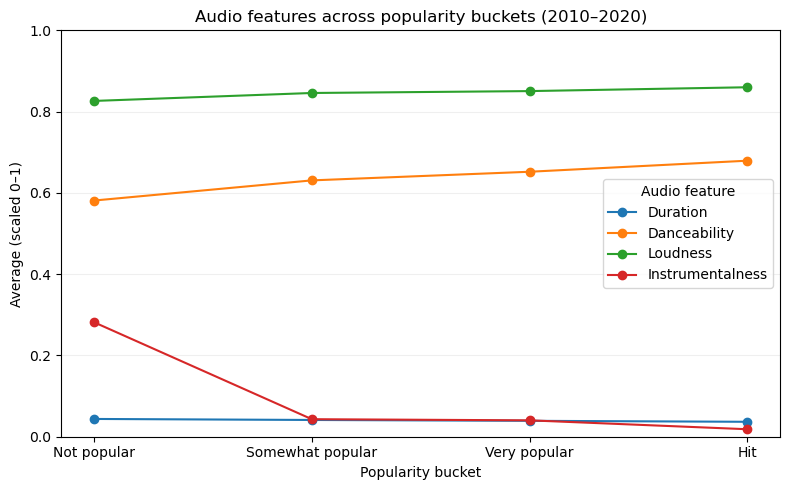

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_decade.copy()

# Features que nos interesan
feature_cols = ['duration_min', 'danceability', 'energy', 'loudness', 'instrumentalness']

# Min-max scaling a [0,1] para cada feature
for col in feature_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    df[col + '_scaled'] = (df[col] - col_min) / (col_max - col_min)


    scaled_cols = [col + '_scaled' for col in feature_cols]

mean_by_bucket = (
    df
    .groupby('pop_bucket')[scaled_cols]
    .mean()
)
mean_by_bucket

# Orden lógico de los buckets
bucket_order = ['non_pop', 'somewhat_pop', 'very_pop', 'hit']
bucket_labels = {
    'non_pop': 'Not popular',
    'somewhat_pop': 'Somewhat popular',
    'very_pop': 'Very popular',
    'hit': 'Hit'
}

plot_df = (
    mean_by_bucket
    .reset_index()
    .melt(
        id_vars='pop_bucket',
        value_vars=scaled_cols,
        var_name='feature',
        value_name='value'
    )
)

# Limpiamos nombres de columnas (quitamos '_scaled')
plot_df['feature'] = plot_df['feature'].str.replace('_scaled', '')

# Hacemos pop_bucket categórico ordenado y añadimos label bonito
plot_df['pop_bucket'] = pd.Categorical(
    plot_df['pop_bucket'],
    categories=bucket_order,
    ordered=True
)
plot_df['pop_bucket_label'] = plot_df['pop_bucket'].map(bucket_labels)

features_to_plot = ['duration_min', 'danceability', 'loudness', 'instrumentalness']

feature_labels = {
    'duration_min': 'Duration',
    'danceability': 'Danceability',
    'loudness': 'Loudness',
    'instrumentalness': 'Instrumentalness',
    'energy': 'Energy'
}

plt.figure(figsize=(8, 5))

for feat in features_to_plot:
    subset = plot_df[plot_df['feature'] == feat].sort_values('pop_bucket')
    plt.plot(
        subset['pop_bucket_label'],
        subset['value'],
        marker='o',
        label=feature_labels[feat]
    )

plt.ylim(0, 1)
plt.xlabel('Popularity bucket')
plt.ylabel('Average (scaled 0–1)')
plt.title('Audio features across popularity buckets (2010–2020)')
plt.grid(axis='y', alpha=0.2)
plt.legend(title='Audio feature')
plt.tight_layout()

plt.savefig('features_by_popularity_bucket.png', dpi=300, bbox_inches='tight')
plt.show()




In [122]:
df_decade.shape

(121426, 29)

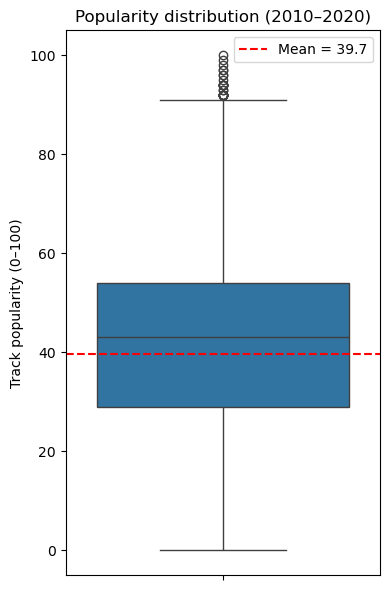

In [123]:
# box plot

import matplotlib.pyplot as plt
import seaborn as sns

pop = df_decade['popularity']

plt.figure(figsize=(4, 6))

sns.boxplot(y=pop)

# Línea de la media
mean_pop = pop.mean()
plt.axhline(mean_pop, color='red', linestyle='--', label=f"Mean = {mean_pop:.1f}")

plt.ylabel('Track popularity (0–100)')
plt.title('Popularity distribution (2010–2020)')
plt.legend()
plt.tight_layout()

plt.savefig('boxplot_popularity_overall.png', dpi=300, bbox_inches='tight')
plt.show()


In [129]:
features = ['duration_min', 'danceability', 'loudness', 'instrumentalness', 'energy']

mean_by_bucket = df_decade.groupby('pop_bucket')[features].mean()

mean_non = mean_by_bucket.loc['non_pop']
mean_very = mean_by_bucket.loc['very_pop']  # o very_pop + hit si lo hicimos así

diff_very_minus_non = (mean_very - mean_non)
diff_very_minus_non.round(3)


/var/folders/sh/7twmcx310r92k4q4qz3tvs2m0000gn/T/ipykernel_31851/1515102636.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bucket = df_decade.groupby('pop_bucket')[features].mean()


duration_min       -0.413
danceability        0.070
loudness            1.429
instrumentalness   -0.241
energy             -0.053
dtype: float64

/var/folders/sh/7twmcx310r92k4q4qz3tvs2m0000gn/T/ipykernel_31851/1632016523.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_by_bucket = df_decade.groupby('pop_bucket')[features].mean()


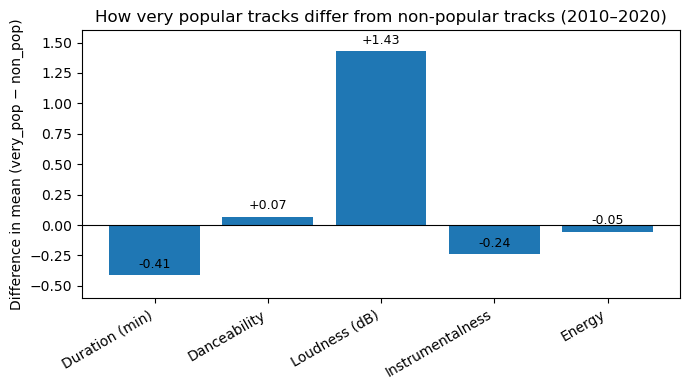

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Features que queremos comparar
features = ['duration_min', 'danceability', 'loudness', 'instrumentalness', 'energy']

# Medias por bucket
mean_by_bucket = df_decade.groupby('pop_bucket')[features].mean()

# Medias de non_pop y very_pop
mean_non  = mean_by_bucket.loc['non_pop']
mean_very = mean_by_bucket.loc['very_pop']

# Diferencias: very_pop - non_pop
diff = (mean_very - mean_non)
diff.round(3)

# Orden y nombres bonitos para el gráfico
features_order = ['duration_min', 'danceability', 'loudness', 'instrumentalness', 'energy']
pretty_names = [
    'Duration (min)',
    'Danceability',
    'Loudness (dB)',
    'Instrumentalness',
    'Energy'
]

values = diff[features_order].values
x = np.arange(len(features_order))

plt.figure(figsize=(7, 4))
bars = plt.bar(x, values)

# Línea en 0 para ver claramente qué sube y qué baja
plt.axhline(0, color='black', linewidth=0.8)

# Etiquetas con el valor numérico en cada barra
for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.annotate(
        f'{val:+.2f}',                                # +0.07, -0.41, etc.
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),                                # pequeño desplazamiento hacia arriba
        textcoords="offset points",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(x, pretty_names, rotation=30, ha='right')
plt.ylabel('Difference in mean (very_pop − non_pop)')
plt.title('How very popular tracks differ from non-popular tracks (2010–2020)')
plt.tight_layout()
plt.ylim(-0.6, 1.6)
plt.savefig('diff_features_very_minus_non.png', dpi=300, bbox_inches='tight')
plt.show()



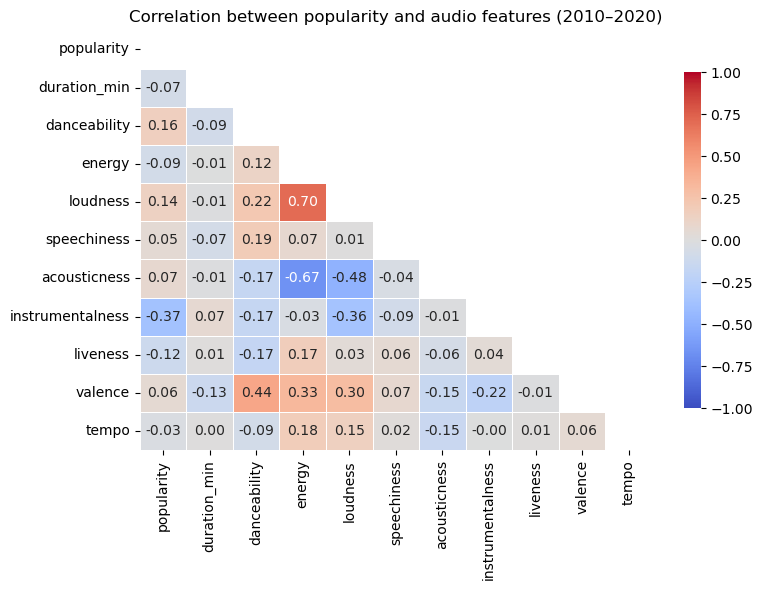

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas numéricas que nos interesan para la correlación
num_cols = [
    'popularity',
    'duration_min',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo'
]

# Por si 'explicit' la quieres incluir como 0/1:
# df_decade['explicit_int'] = df_decade['explicit'].astype(int)
# num_cols.append('explicit_int')

# Matriz de correlaciones
corr = df_decade[num_cols].corr()

# Máscara: True en el triángulo superior → se oculta en el heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(
    corr,
    mask=mask,            # aquí aplicamos la máscara
    annot=True,           # muestra los números
    fmt=".2f",            # dos decimales
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation between popularity and audio features (2010–2020)')
plt.tight_layout()
plt.savefig('corr_triangle_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


# PREDICTIVE MODEL

In [134]:
df_model = df_decade.copy()

df_model['is_popular'] = (df_model['popularity'] >= 55).astype(int)
df_model['explicit_int'] = df_model['explicit'].astype(int)


In [135]:
feature_cols = [
    'duration_min',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'explicit_int'
]

X = df_model[feature_cols]
y = df_model['is_popular']


In [136]:
feature_cols = [
    'duration_min',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'explicit_int'
]

X = df_model[feature_cols]
y = df_model['is_popular']


In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [138]:
import numpy as np

baseline_pred = np.full_like(y_test, fill_value=y_train.mode()[0])
baseline_acc = (baseline_pred == y_test).mean()
print("Baseline accuracy (always predict majority class):", round(baseline_acc, 3))


Baseline accuracy (always predict majority class): 0.754


In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

log_reg_clf.fit(X_train, y_train)

y_pred = log_reg_clf.predict(X_test)
y_proba = log_reg_clf.predict_proba(X_test)[:, 1]

print("Logistic Regression – classification report:\n")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression – classification report:

              precision    recall  f1-score   support

           0       0.83      0.62      0.71     18323
           1       0.34      0.61      0.44      5963

    accuracy                           0.62     24286
   macro avg       0.59      0.61      0.57     24286
weighted avg       0.71      0.62      0.64     24286

ROC-AUC: 0.6675536544926866
Confusion matrix:
 [[11383  6940]
 [ 2344  3619]]


In [140]:
import pandas as pd

coef = log_reg_clf.named_steps['clf'].coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coef': coef
}).sort_values('coef', ascending=False)

coef_df


,feature,coef
3,loudness,0.392400
10,explicit_int,0.283428
1,danceability,0.155214
9,tempo,-0.002221
5,acousticness,-0.028166
4,speechiness,-0.035117
7,liveness,-0.074442
8,valence,-0.164414
6,instrumentalness,-0.235343
0,duration_min,-0.255113
